In [1]:
import numpy as np 
import torch 
import matplotlib.pyplot as plt 

import torch.nn.functional as F
from torch import nn

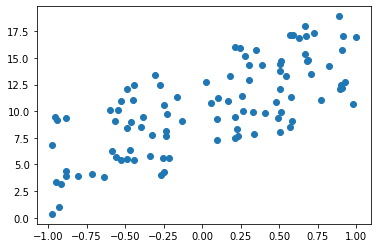

In [2]:
n = 100

d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],[5]])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
plt.scatter(x[:,0],y_true)


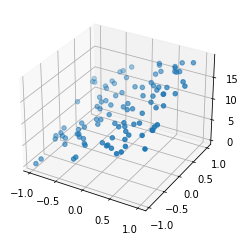

In [3]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x[:,0],x[:,1],y_true)



In [4]:
x_torch=torch.tensor(x,dtype=torch.float32)
y_torch=torch.tensor(y_true,dtype=torch.float32)

In [5]:
class Model(nn.Module):
    
    def __init__(self, in_size,units=1):
        super(Model,self).__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, units)
        
   
    def training_step(self,x_train,y_true):
        y_pred=self.linear1(x_train)
        loss=F.mse_loss(y_pred,y_true)
        
        return loss
    def epoch_end(self, epoch, train_loss):
        print("Epoch [{}], _loss: {:.4f}, ".format(epoch, train_loss))
    
       
      

In [6]:
model=Model(2)
model.training_step(x_torch,y_torch)

tensor(111.6059, grad_fn=<MseLossBackward0>)

In [7]:
def fit(x,y,epochs,lr, model,opt_func=torch.optim.SGD):

    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        
        loss = model.training_step(x,y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        # Validation phase
        if epoch%10==0:
        
            model.epoch_end(epoch, loss.detach().numpy())
        history.append(loss.detach().numpy())
    return history

In [8]:
history=fit(x_torch,y_torch,200,0.01,model)

Epoch [0], _loss: 111.6059, 
Epoch [10], _loss: 76.5981, 
Epoch [20], _loss: 52.9888, 
Epoch [30], _loss: 37.0108, 
Epoch [40], _loss: 26.1489, 
Epoch [50], _loss: 18.7235, 
Epoch [60], _loss: 13.6116, 
Epoch [70], _loss: 10.0621, 
Epoch [80], _loss: 7.5717, 
Epoch [90], _loss: 5.8029, 
Epoch [100], _loss: 4.5288, 
Epoch [110], _loss: 3.5963, 
Epoch [120], _loss: 2.9020, 
Epoch [130], _loss: 2.3756, 
Epoch [140], _loss: 1.9692, 
Epoch [150], _loss: 1.6497, 
Epoch [160], _loss: 1.3942, 
Epoch [170], _loss: 1.1869, 
Epoch [180], _loss: 1.0162, 
Epoch [190], _loss: 0.8741, 


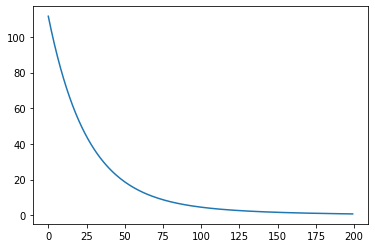

In [9]:
plt.plot(history)